WEEK 3:
Perform Feature Engineering and Feature Selection Methods.

WEEK 5:
Build models using Decision trees.

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


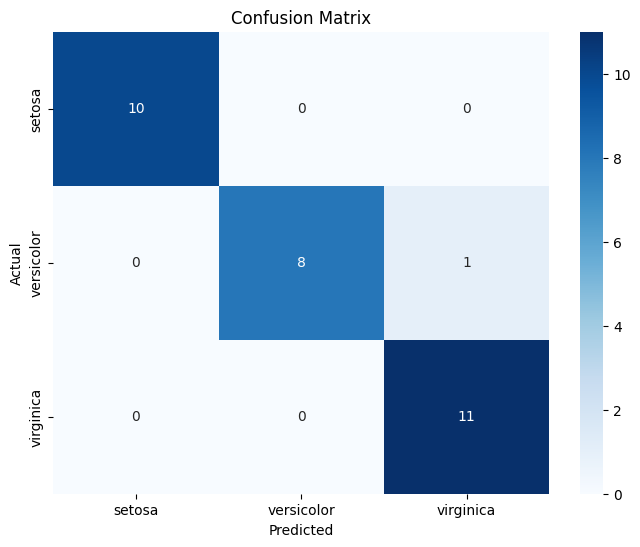

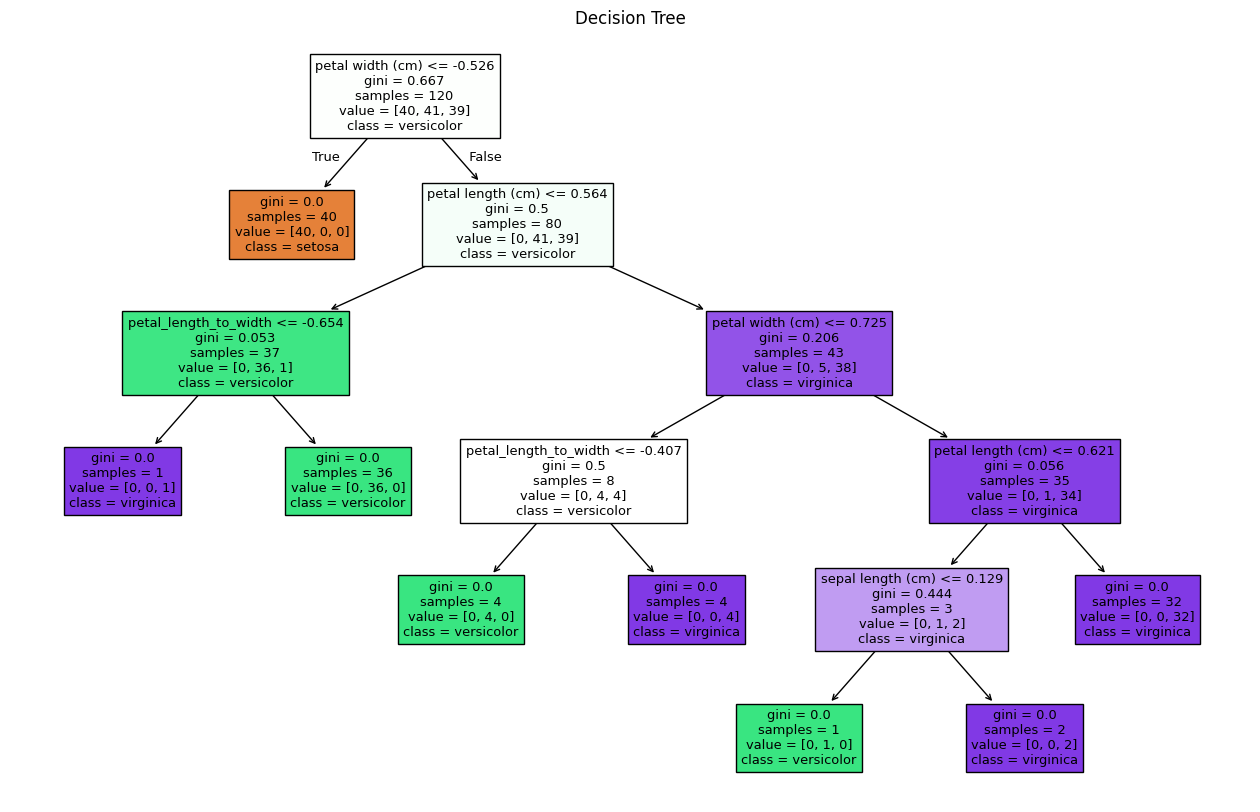

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Feature Engineering: Adding new features
X['sepal_length_to_width'] = X['sepal length (cm)'] / X['sepal width (cm)']
X['petal_length_to_width'] = X['petal length (cm)'] / X['petal width (cm)']

# Feature Selection: Selecting top 4 features using Chi-Squared test
selector = SelectKBest(score_func=chi2, k=4)
X_new = selector.fit_transform(X, y)

# Feature Scaling after feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(dtc, filled=True, class_names=iris.target_names, feature_names=X.columns[selector.get_support()])
plt.title('Decision Tree')
plt.show()
